In [1]:
import requests;                                 # import package used to downlaod data from a web URL
import json;
import pandas as pd;
import matplotlib.pyplot as plt;
import matplotlib;
import datetime as dt
import time
import numpy as np

from pandas.io.json import json_normalize

matplotlib.style.use('ggplot');
%matplotlib inline

In [20]:
qualityDict = {0 : 'Normal', 1 : 'Genuine', 2 : 'Unused', 3 : 'Vintage', 4 : 'Unused', 5 : 'Unusual', 6 : 'Unique', 7 : 'Unused', 8 : 'Unused', 9 : 'Keys', 10 : 'Unused', 11 : 'Strange', 12 : 'Unused', 13 : 'Haunted', 14 : 'Collectors', 15 : 'Unused'}

In [2]:
dfIn = pd.read_csv('itemhistory.csv', dtype={'Craft':str, 'DateTime':dt.datetime, 'DefIndex':np.float64, 'Name':str,
                                            'PriceIndex':str, 'QualInt':np.int64, 'Trade':str, 'currency':str,
                                            'timestamp':np.float64, 'value':np.float64, 'value_high':np.float64})
dfIn['DateTime'] = pd.to_datetime(dfIn['DateTime'])
dfIn = dfIn.set_index(['Name', 'DefIndex', 'QualInt', 'Trade', 'Craft', 'PriceIndex'])
dfIn.sort_index(inplace = True)
df2 = dfIn.reset_index()

In [3]:
df2.head(10)

,Name,DefIndex,QualInt,Trade,Craft,PriceIndex,timestamp,DateTime,currency,value,value_high
0,A Brush with Death,30186,6,Tradable,Craftable,0,1381676945,2013-10-13 15:09:05,keys,1.00,1.00
1,A Brush with Death,30186,6,Tradable,Craftable,0,1383401806,2013-11-02 14:16:46,metal,5.66,6.00
2,A Brush with Death,30186,6,Tradable,Craftable,0,1383665506,2013-11-05 15:31:46,metal,5.33,6.00
3,A Brush with Death,30186,6,Tradable,Craftable,0,1383798437,2013-11-07 04:27:17,metal,5.00,5.33
4,A Brush with Death,30186,6,Tradable,Craftable,0,1383859373,2013-11-07 21:22:53,metal,4.66,5.00
5,A Brush with Death,30186,6,Tradable,Craftable,0,1384015717,2013-11-09 16:48:37,metal,4.66,4.66
6,A Brush with Death,30186,6,Tradable,Craftable,0,1384161954,2013-11-11 09:25:54,metal,4.33,4.66
7,A Brush with Death,30186,6,Tradable,Craftable,0,1384383384,2013-11-13 22:56:24,metal,4.00,4.33
8,A Brush with Death,30186,6,Tradable,Craftable,0,1384656665,2013-11-17 02:51:05,metal,4.00,4.00
9,A Brush with Death,30186,6,Tradable,Craftable,0,1398733640,2014-04-29 01:07:20,metal,3.66,4.00


In [17]:
item_counts=df2['Name'].value_counts()
#item_counts

In [5]:
count = 0
mostPopular = []
for key, value in item_counts.iteritems():
    if count == 5:
        break
    mostPopular.append(key)
    count = count + 1

In [18]:
mostPopular

['Earbuds',
 'Team Captain',
 "Villain's Veil",
 'Stainless Pot',
 'Exquisite Rack']

In [7]:
df5 = df2.query("Name in @mostPopular")

In [9]:
#df5.plot(x=df5['DateTime'], y=df5['value'])

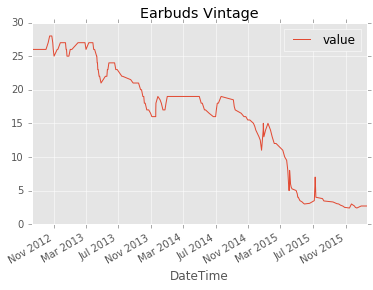

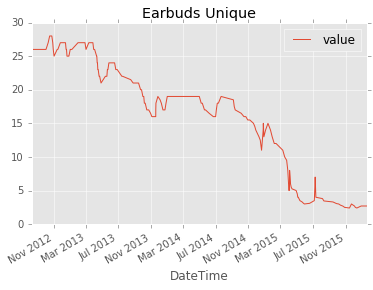

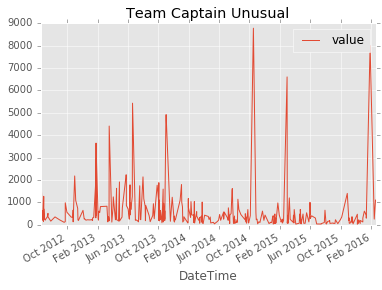

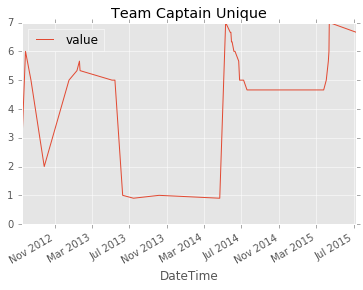

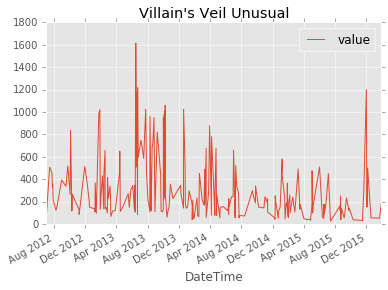

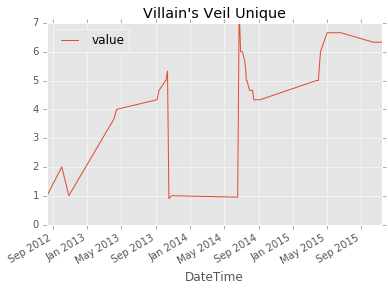

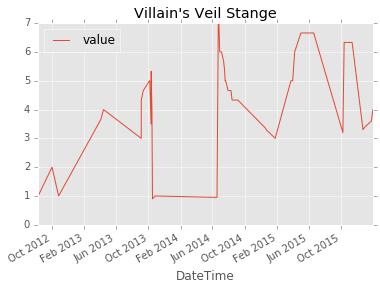

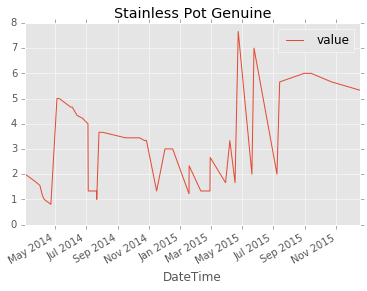

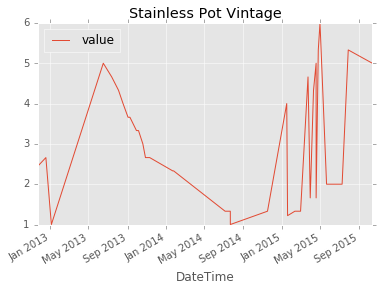

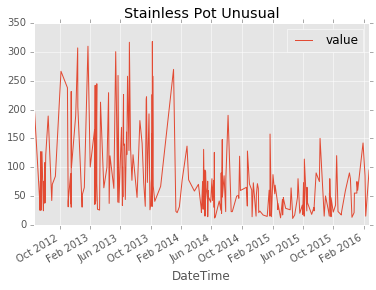

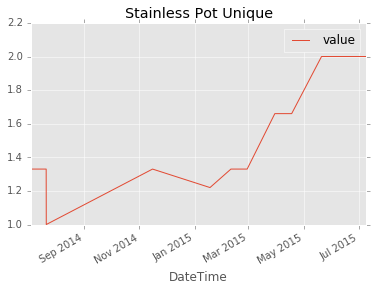

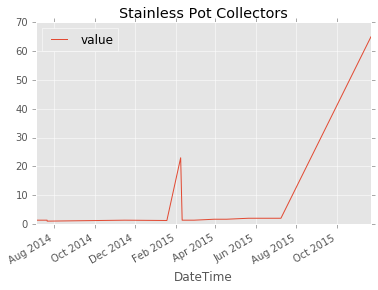

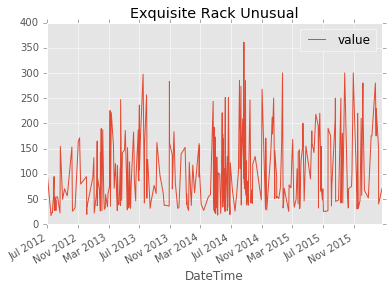

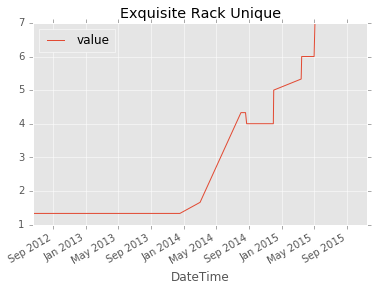

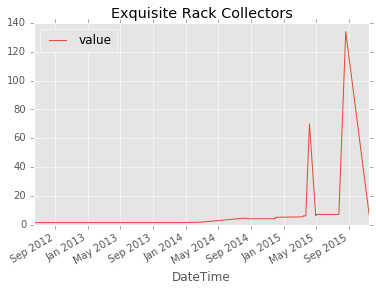

In [24]:
for item in mostPopular:
    plot1 = df5[df5.Name == item]
    plot1Qual = plot1.QualInt.drop_duplicates('last')
    #print item
    for quality in plot1Qual:
        plot2 = plot1[plot1.QualInt == quality]
        #print quality
        qualityString = None
        for key, value in qualityDict.iteritems():
            if (key == quality):
                qualityString = qualityDict[quality]
        titl = item + " " + str(qualityString)
        plot2.plot(x='DateTime',y='value',title=titl)